In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os,cv2
def plot_gallery(images, titles,h,w,n_row=3,n_col=4):
  plt.figure(figsize=(1.8* n_col,2.4 * n_row))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(n_row * n_col):
    plt.subplot(n_row, n_col,i+1)
    plt.imshow(images[i].reshape((h,w)),cmap=plt.cm.gray)
    plt.title(titles[i],size=12)
    plt.xticks(())
    plt.yticks()

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
dir_name = '/content/drive/MyDrive/dataset/faces/'
y = []
X = []
target_names = []
person_id = 0
h = w = 300
n_samples = 0

for person_name in os.listdir(dir_name):
    dir_path = dir_name + person_name + "/"
    target_names.append(person_name)

    for image_name in os.listdir(dir_path):
        image_path = dir_path + image_name
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray, (h, w))
        v = resized_image.flatten()
        X.append(v)
        n_samples += 1
        y.append(person_id)

    person_id += 1

y = np.array(y)
X = np.array(X)
target_names = np.array(target_names)

n_features = X.shape[1]
n_classes = target_names.shape[0]

print("Shape of y:", y.shape)
print("Shape of X:", X.shape)
print("Shape of target_names:", target_names.shape)

print("Number of samples:", n_samples)
print("Total dataset size:")
print("n_samples:",  n_samples)
print("n_features:",  n_features)
print("n_classes:",  n_classes)


Shape of y: (450,)
Shape of X: (450, 90000)
Shape of target_names: (9,)
Number of samples: 450
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 9


Extracting the top 150 eigenfaces from 337 faces


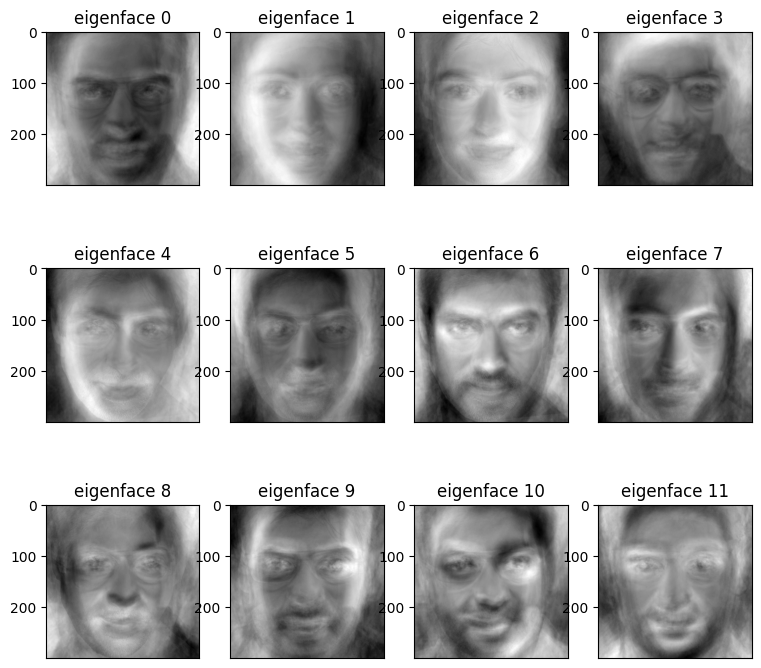

Projecting the input data on the eigenface orthonormal basis
(337, 150) (113, 150)
project done...


In [9]:
X_train, X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.25,random_state=42)
n_components = 150
print("Extracting the top %d eigenfaces from %d faces"%(n_components,X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
eigenface=pca.components_.reshape((n_components,h,w))
eigenface_titles=["eigenface %d" % i for i in range(eigenface.shape[0])]
plot_gallery(eigenface, eigenface_titles, h, w)
plt.show()
print("Projecting the input data on the eigenface orthonormal basis")
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca,y_train)
X_train_lda=lda.transform(X_train_pca)
X_test_lda=lda.transform(X_test_pca)
print("project done...")

In [10]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10),max_iter=1000, verbose=True).fit(X_train_lda, y_train)
print("model wieghts:")
model_info=[coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 3.00659154
Iteration 2, loss = 2.95635860
Iteration 3, loss = 2.90728580
Iteration 4, loss = 2.85820189
Iteration 5, loss = 2.81223981
Iteration 6, loss = 2.76832492
Iteration 7, loss = 2.72260175
Iteration 8, loss = 2.67937368
Iteration 9, loss = 2.63872441
Iteration 10, loss = 2.59618727
Iteration 11, loss = 2.55683587
Iteration 12, loss = 2.52085735
Iteration 13, loss = 2.48504012
Iteration 14, loss = 2.45069334
Iteration 15, loss = 2.41559984
Iteration 16, loss = 2.38440527
Iteration 17, loss = 2.35240114
Iteration 18, loss = 2.32316839
Iteration 19, loss = 2.29391265
Iteration 20, loss = 2.26662983
Iteration 21, loss = 2.24083973
Iteration 22, loss = 2.21574429
Iteration 23, loss = 2.19337801
Iteration 24, loss = 2.17074467
Iteration 25, loss = 2.14786615
Iteration 26, loss = 2.12768803
Iteration 27, loss = 2.10628019
Iteration 28, loss = 2.08766981
Iteration 29, loss = 2.06789823
Iteration 30, loss = 2.04947027
Iteration 31, loss = 2.03112826
Iteration 32, los

Accuracy: 74.33628318584071


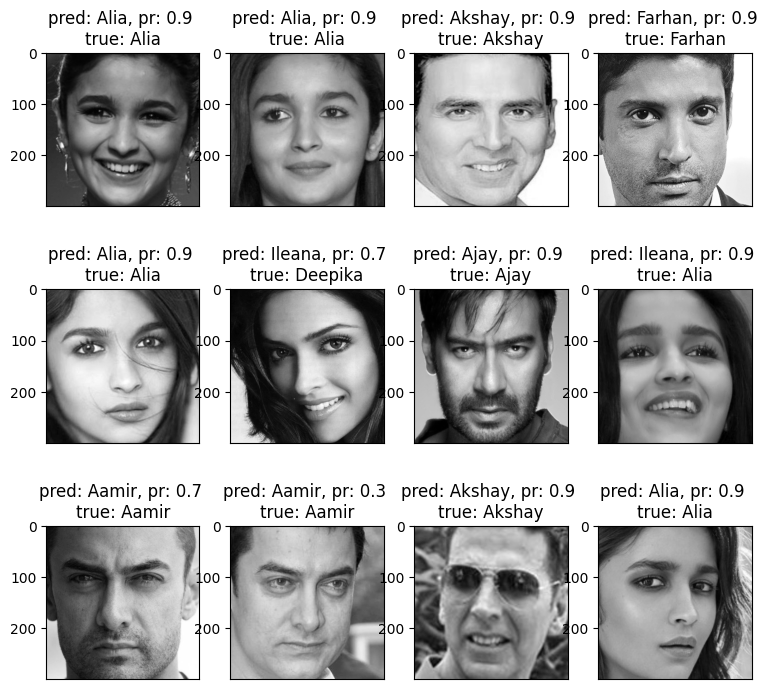

In [19]:
y_pred=[];y_prob=[]
for test_face in X_test_lda:
  prob=clf.predict_proba([test_face])[0]
  class_id=np.where(prob==np.max(prob))[0][0]
  y_pred.append(class_id)
  y_prob.append(np.max(prob))
y_pred=np.array(y_pred)
prediction_titles=[]
true_positive=0
class_names=target_names
for i in range (y_pred.shape[0]):
  true_name=class_names[y_test[i]]
  pred_name=class_names[y_pred[i]]
  result='pred: %s, pr: %s \ntrue: %s' %(pred_name, str(y_prob[i])[0:3],true_name)
  prediction_titles.append(result)
  if true_name==pred_name:
    true_positive =true_positive+1
print("Accuracy:",true_positive*100/y_pred.shape[0])
plot_gallery(X_test, prediction_titles, h, w)
plt.show()
